In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string

In [2]:
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
data1 = pd.read_csv('Language Detection.csv')
data2 = pd.read_csv('hindi.csv')

In [6]:
data1

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [7]:
data2

,Text,Language
0,चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...,Hindi
1,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,Hindi
2,बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...,Hindi
3,"बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...",Hindi
4,1959 में घटित चर्चित नानावटी कांड में एक क्राइ...,Hindi
...,...,...
713,31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...,Hindi
714,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...,Hindi
715,Chandermohan.sharma@timesgroup.com ग्लैमर इंडस...,Hindi
716,"निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...",Hindi


In [8]:
data = data1.append(data2,ignore_index=True)
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
11050,31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...,Hindi
11051,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...,Hindi
11052,Chandermohan.sharma@timesgroup.com ग्लैमर इंडस...,Hindi
11053,"निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...",Hindi


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11055 non-null  object
 1   Language  11055 non-null  object
dtypes: object(2)
memory usage: 172.9+ KB


In [10]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Hindi          781
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: Language, dtype: int64

In [11]:
data[data.Language=='Kannada'].sample(3)

,Text,Language
10232,"ನಾನು ಎಲ್ಲಾ ವಾರಾಂತ್ಯದಲ್ಲಿ ಮುಕ್ತನಾಗಿದ್ದೇನೆ, ಏನಾದ...",Kannada
9974,ನಿಮಗೆ ಸಾಕಷ್ಟು ಕಾರ್ಯಯೋಜನೆಗಳಿವೆ ಎಂದು ಹೇಳೋಣ ಮತ್ತು...,Kannada
10218,ಒಂದು ಕ್ಷಣ ಹಿಡಿದುಕೊಳ್ಳಿ.,Kannada


In [12]:
data[data.Language=='German'].sample(3)

,Text,Language
9658,und du bist wie oh das erklärt es das erklärt es.,German
9642,"Ich habe nicht zugehört, weil du vielleicht be...",German
9886,"Oh je, eines Nachts, als sie schlief, saß ihre...",German


In [13]:
data[data.Language=='Turkish'].sample(3)

,Text,Language
7908,şeklinde değiştirmiştir.,Turkish
7834,"Bilgiler tartışılır, değerlendirilir ve içeriğ...",Turkish
8208,sana bir bardak su getirebilir miyim?,Turkish


In [14]:
data[data.Language=='Arabic'].sample(3)

,Text,Language
9245,إذا لم تكن قد ضغطت بالفعل على زر الاشتراك ورمز...,Arabic
9380,يضربني.,Arabic
9175,"تم استخدام مصطلح ""التعلم الآلي"" لأول مرة في عا...",Arabic


In [15]:
data[data.Language=='Greek'].sample(3)

,Text,Language
5703,συνάντησε κατά τη διάρκεια των ταξιδιών του ή ...,Greek
5637,Η Βικιπαίδεια έχει αυξηθεί σταθερά σε δημοτικό...,Greek
5774,συγνώμη δεν άκουσα.,Greek


In [16]:
data[data.Language=='Dutch'].sample(3)

,Text,Language
4497,als je nog niet op de abonneerknop en het belp...,Dutch
4717,kan ik je een glas water geven?,Dutch
4455,nu gebruiken we hier vaak het woord geweldig '...,Dutch


In [17]:
data[data.Language=='Malayalam'].sample(3)

,Text,Language
1944,അന്ന് അവൾ അവളുടെ ജീവിതം നയിക്കും.,Malayalam
1835,അഭിപ്രായങ്ങൾ.,Malayalam
1890,ഇത് ചെയ്യാൻ എന്നെ സഹായിക്കാമോ എന്ന് ഞാൻ ചിന്തി...,Malayalam


In [18]:
data[data.Language=='Sweedish'].sample(3)

,Text,Language
8691,tack för din insats.,Sweedish
8819,"kan du prata lite långsammare, snälla du?",Sweedish
8830,undvika en fråga.,Sweedish


In [19]:
data[data.Language=='Russian'].sample(3)

,Text,Language
6385,как дела?,Russian
6460,"вы можете сделать это, если у кого-то все хоро...",Russian
6055,"Так, на странице «История», прилагающейся к ка...",Russian


In [20]:
data[data.Language=='French'].sample(3)

,Text,Language
3719,"Wikislavia existe en russe, en une langue appe...",French
4054,oh c'est allumé et vous l'avez probablement en...,French
4045,J'ai paniqué une autre phrase que les locuteur...,French


In [21]:
data[data.Language=='Hindi'].sample(3)

,Text,Language
10553,\n\nसम्राट एंड कंपनी का जासूस सम्राट तिलक धारी...,Hindi
10420,शेफ की कहानी: रोशन कालरा (सैफ) एक थ्री-स्टार म...,Hindi
10928,"निर्माता :\nफरहान अख्तर, रितेश सिधवानी\n\nनिर्...",Hindi


In [22]:
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text.lower()

In [23]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [24]:
X0 = data.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)
X0

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
11050    31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...
11051    \n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11052    .@. ग्लैमर इंडस्ट्री में आर. बाल्की को बिग बी ...
11053    निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...
11054    फोर्स 2 उन अंडरकवर एजेंट्स को समर्पित है जो सम...
Length: 11055, dtype: object

In [25]:
X1 = X0.apply(removeSymbolsAndNumbers)
X1

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
11050     अक्टूबर  को काला दिवस कहा जाता है। इस दिन तत्...
11051    \n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11052     ग्लैमर इंडस्ट्री में आर बाल्की को बिग बी का ऐ...
11053    निर्माता \nसुनीता गोवारीकर अजय बिजली संजीव के ...
11054    फोर्स  उन अंडरकवर एजेंट्स को समर्पित है जो समय...
Length: 11055, dtype: object

In [26]:
y = data['Language']

In [27]:
X_train,X_test, y_train,y_test = train_test_split(X1,y,test_size=0.20,random_state=42)

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [29]:
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [30]:
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [31]:
y_pred = model.predict(X_test)

In [32]:
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [33]:
print('Accuracy of the model: ',ac)

Accuracy of the model:  0.9841700587969244


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       112
      Danish       0.95      0.93      0.94        81
       Dutch       1.00      0.94      0.97       116
     English       0.97      1.00      0.98       284
      French       0.98      1.00      0.99       216
      German       0.98      0.98      0.98        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00       150
     Italian       0.98      0.97      0.98       133
     Kannada       1.00      1.00      1.00        70
   Malayalam       1.00      0.99      1.00       119
  Portugeese       0.98      0.97      0.98       151
     Russian       1.00      1.00      1.00       137
     Spanish       0.96      0.97      0.97       152
    Sweedish       0.97      0.96      0.97       142
       Tamil       1.00      1.00      1.00        87
     Turkish       0.99      1.00      0.99        94

    accuracy              

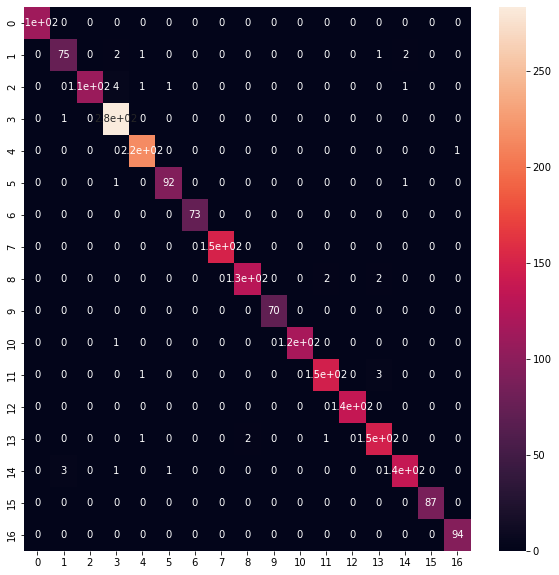

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.show()
%matplotlib inline

In [36]:
def predict(text):
    lang = model.predict([text])
    print("Language: ",lang[0])

In [37]:
predict("The way to get started is to quit talking and begin doing.")

Language:  English


In [38]:
predict("La façon de commencer est d'arrêter de parler et de commencer à faire")

Language:  French


In [39]:
predict("Der Weg, um anzufangen, besteht darin, mit dem Reden aufzuhören und mit dem Handeln zu beginnen.")

Language:  German


In [40]:
predict('Başlamanın yolu, konuşmayı bırakıp yapmaya başlamaktır.')

Language:  Turkish


In [41]:
predict('De manier om te beginnen is door te stoppen met praten en te beginnen met doen.')

Language:  Dutch


In [42]:
predict('Sättet att komma igång är att sluta prata och börja göra.')

Language:  Sweedish


In [43]:
predict('आरंभ करने का तरीका यह है कि बात करना छोड़ दें और करना शुरू करें।')

Language:  Hindi
